<a href="https://colab.research.google.com/github/s10758018/Data/blob/master/%E3%80%8C1217%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
system("ls", TRUE)

[1] "sample_data"

In [5]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(SportsAnalytics)

In [10]:
 NBA1516<-fetch_NBAPlayerStatistics("15-16")

In [7]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



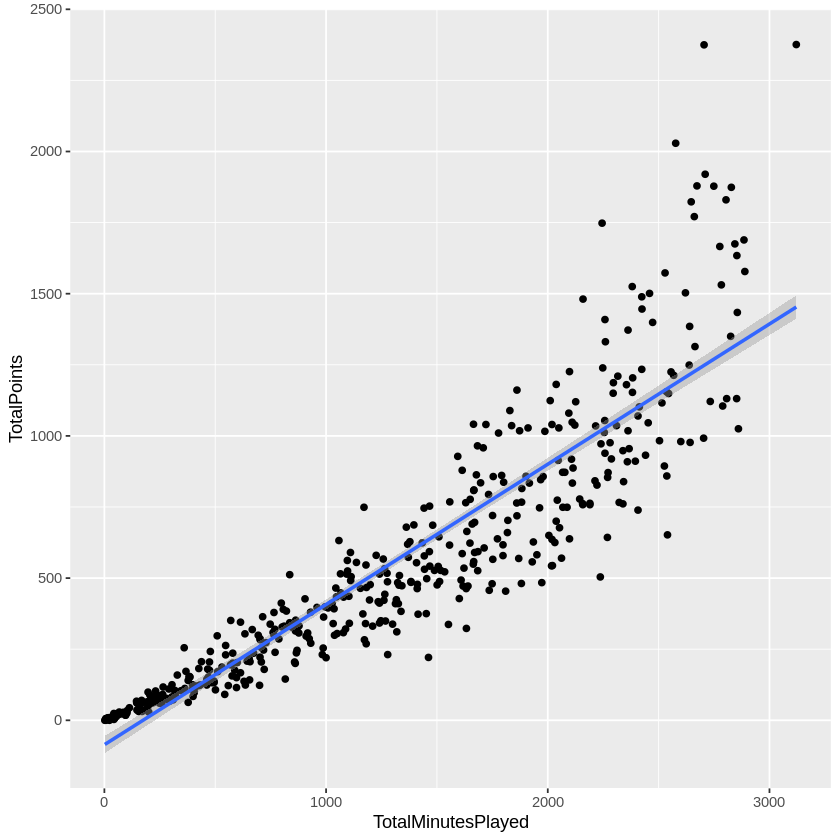

In [11]:
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+
geom_point()+geom_smooth(method = "glm")
#上場越久，得分越高

In [12]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [13]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [14]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [18]:
mydata <- read.csv("https://ncku.ml/WZZQ")

In [19]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [20]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [21]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(rpart)


In [25]:
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

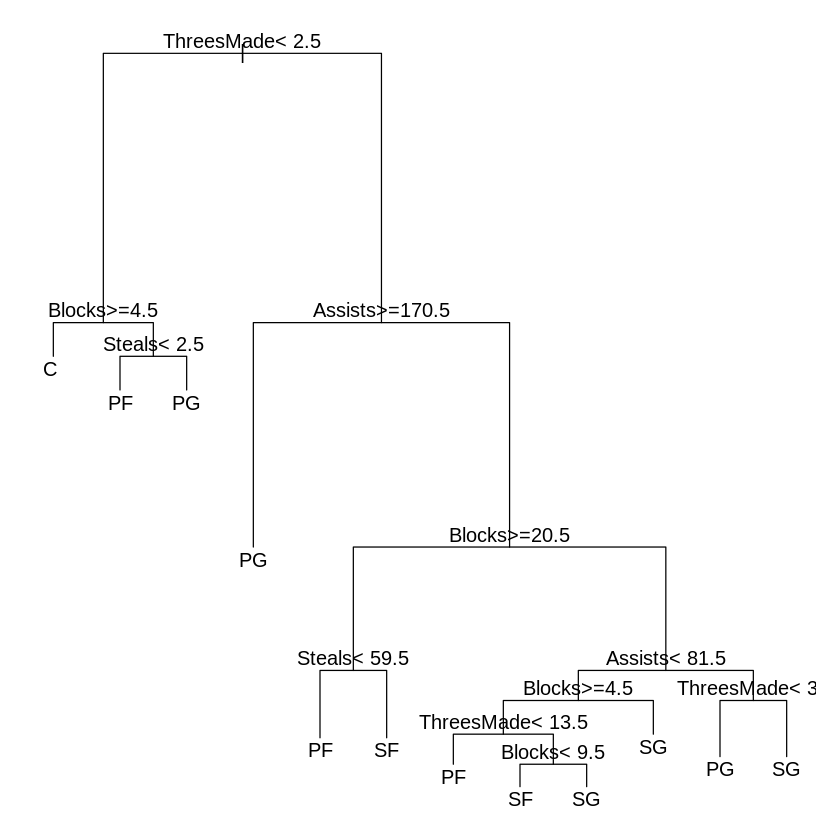

In [26]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



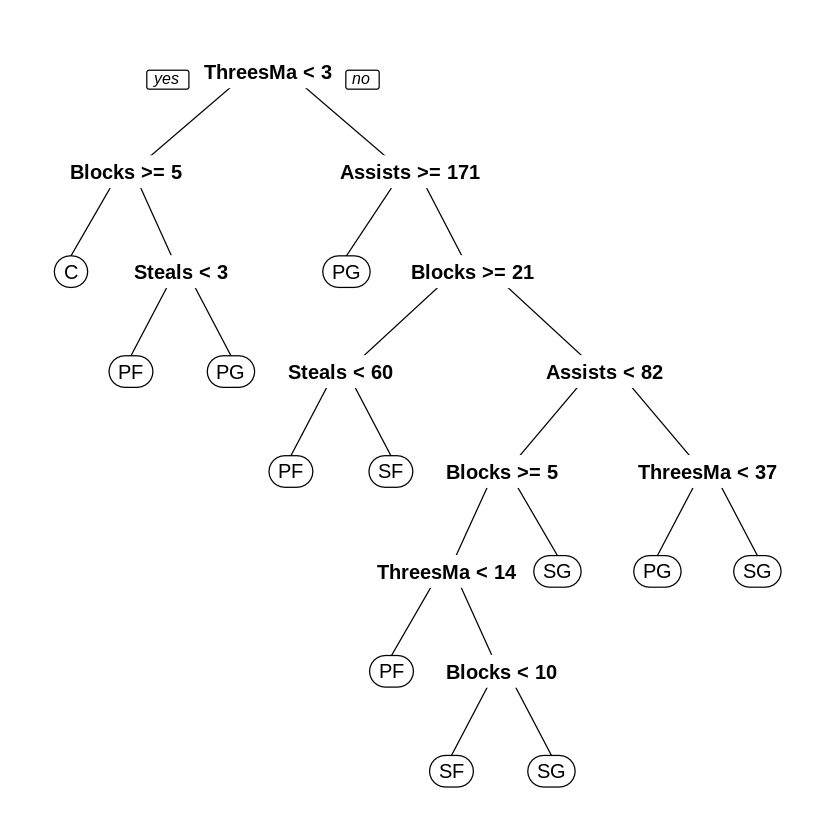

In [27]:
install.packages("rpart.plot") #第一次使用前須先安裝

library(rpart.plot)
prp(DT)

In [28]:
mtcars.mxs<-as.matrix(mtcars)
d<-dist(mtcars.mxs) #預設為euclidean
head(d)

[1]   0.6153251  54.9086059  98.1125212 210.3374396  65.4717710 241.4076490

In [29]:
d<-dist(mtcars.mxs, method="manhattan") #計算manhattan距離
head(d)

[1]   0.815  79.300 108.795 275.430  84.640 347.960

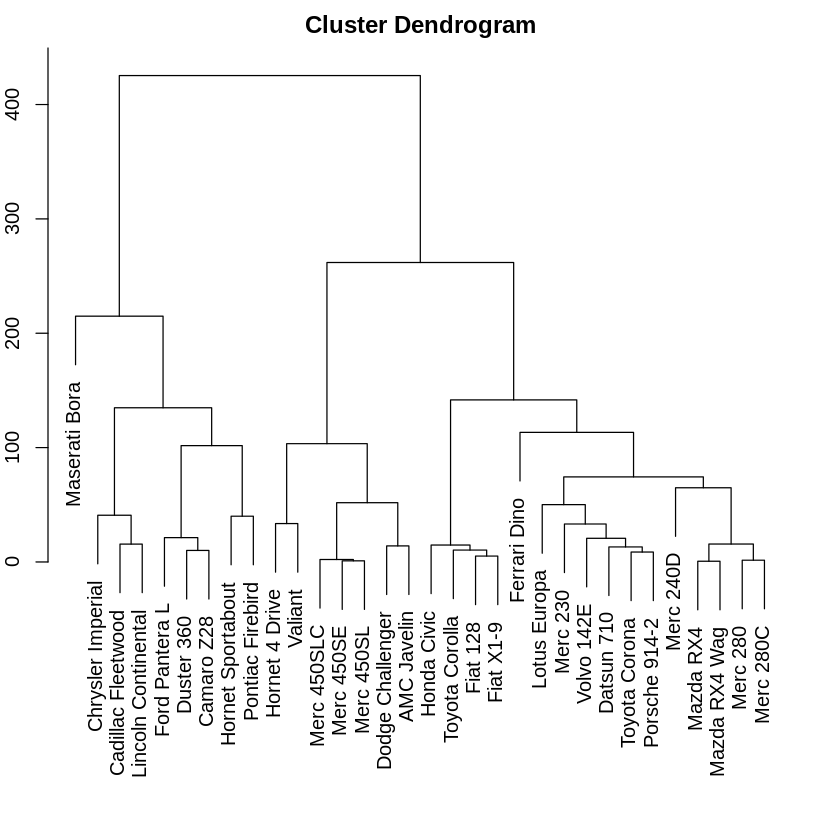

In [30]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs)) #可用method參數設定聚合方法,預設為complete
plot(hc)

ERROR: ignored

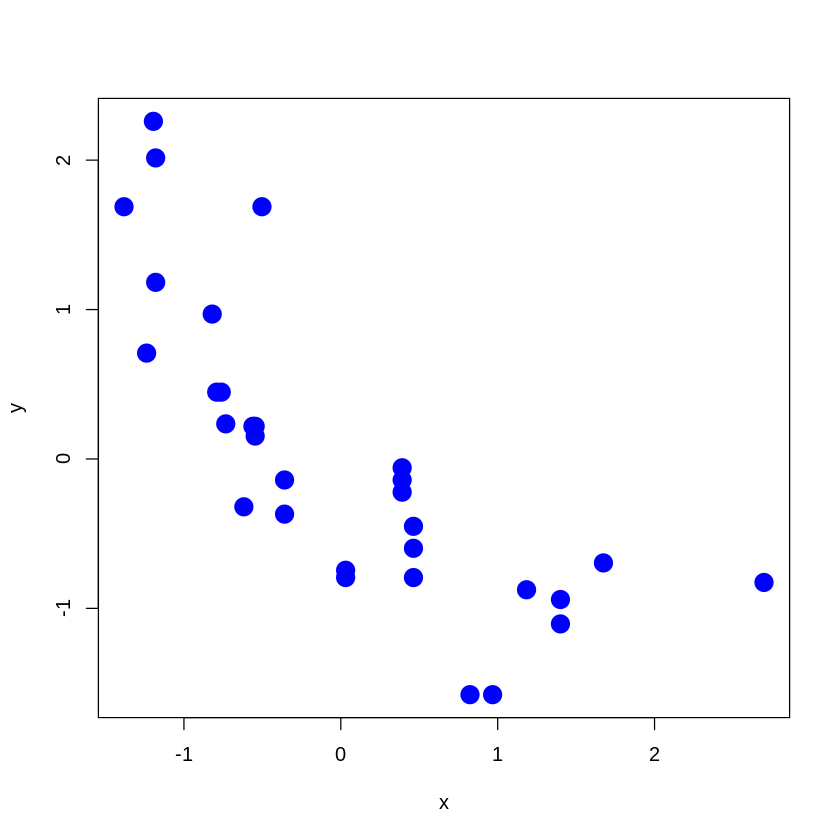

In [32]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [33]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

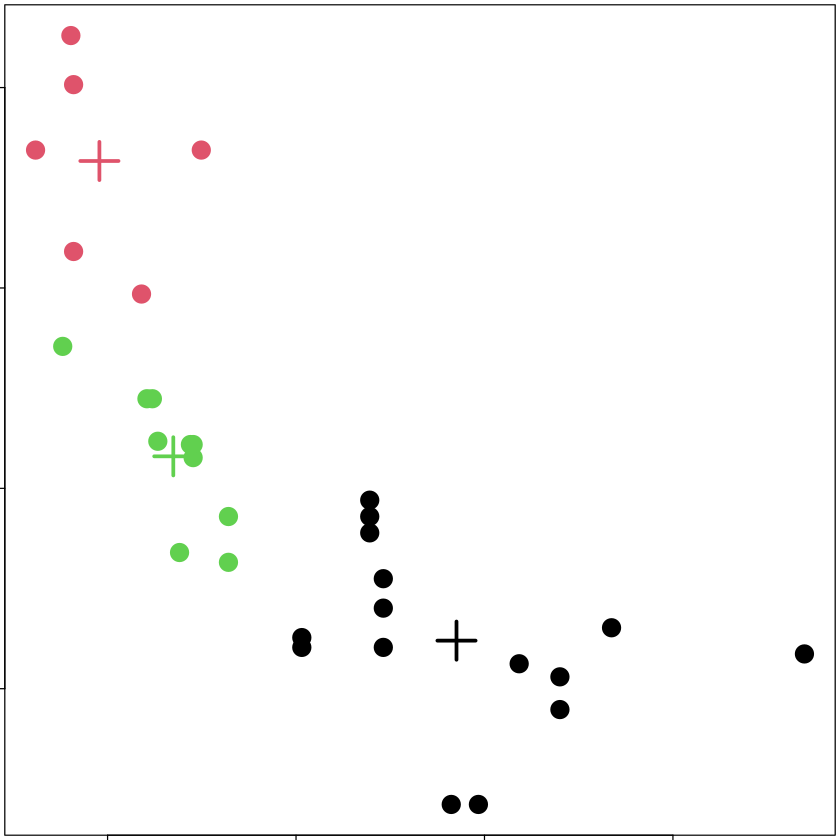

In [34]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

In [35]:
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [36]:
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [37]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [38]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [39]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5]) # Show the top 5 rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [59]:
devtools::install_github("rstudio/tensorflow")

rappdirs   (NA    -> 0.3.1) [CRAN]
jsonlite   (1.7.1 -> 1.7.2) [CRAN]
reticulate (NA    -> 1.18 ) [CRAN]
config     (NA    -> 0.3  ) [CRAN]
ps         (1.4.0 -> 1.5.0) [CRAN]
tfruns     (NA    -> 1.4  ) [CRAN]


Installing 6 packages: rappdirs, jsonlite, reticulate, config, ps, tfruns

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmprbrHXN/remotes38657f37a8/rstudio-tensorflow-ef1e970/DESCRIPTION’
─  preparing ‘tensorflow’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘tensorflow_2.2.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
install.packages("drat", repos="https://cran.rstudio.com")
drat:::addRepo("dmlc")
install.packages("mxnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘mxnet’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [40]:
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}

In [42]:
NBA1819<-fetch_NBAPlayerStatistics("18-19")
NBA1819<-NBA1819[complete.cases(NBA1819),]

In [43]:
sample(1:10,3)

[1] 2 4 6

In [44]:
sample(1:nrow(NBA1819),nrow(NBA1516)/3)

[1] 256 226 396  37 429 515 491 376  66 444 308  48 503 355 524 411 109 234
 [19] 347  72 318 516 497 502 175 328 469 270 467 513 166 371 436 470 340 228
 [37] 164 205 342 193 304  61 294 292  97 388 331 418 447 496 474 345 310  95
 [55] 519 341 135  38 529 473 296 425 384 463 257 312 238 446 374 123 445  44
 [73] 427 413 198 148   4 110 450 431 125 407 479  98 230 134  26  94 353 401
 [91] 432 325 480 118 153 485 208 361 518  69 150 440 217 157 403 149 486  18
[109]  27  96   1 220 392   7 339 456 147  25 314 143 438 298 266 291 127 319
[127] 197 279 142  49 207 140 126 512 398 103 349  12  55 167 253 155 408 250
[145] 280  51   2  59 498 406 494 263 478 255 526 179   6 144

In [70]:
NBA1516$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1516[sample(1:nrow(NBA1516),nrow(NBA1516)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1516$Test==F),sum(NBA1516$Test==T))

[1] 318 158

In [80]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1516[NBA1516$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.1498,7.1358,1.28,2.0e-01
TotalMinutesPlayed,0.0034,0.0075,0.46,6.5e-01
FieldGoalsAttempted,0.9963,0.0220,45.22,2.8e-138
PositionPF,-16.8016,7.6627,-2.19,2.9e-02
PositionPG,-37.3928,8.5675,-4.36,1.7e-05
PositionSF,-16.6742,8.4579,-1.97,5.0e-02
PositionSG,-23.2352,8.4330,-2.76,6.2e-03
ThreesAttempted,0.1224,0.0294,4.17,4.0e-05
FreeThrowsAttempted,0.7231,0.0369,19.58,4.4e-56


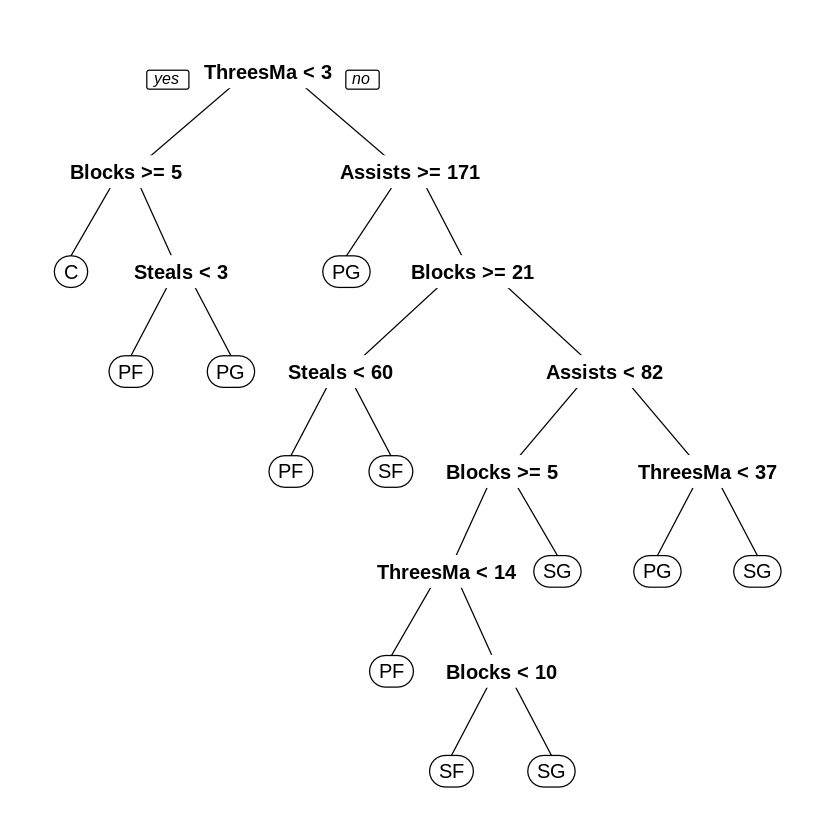

In [71]:
if (!require('rpart.plot')){
install.packages("rpart.plot");
library(rpart.plot)
}
prp(DT) # 把決策樹畫出來

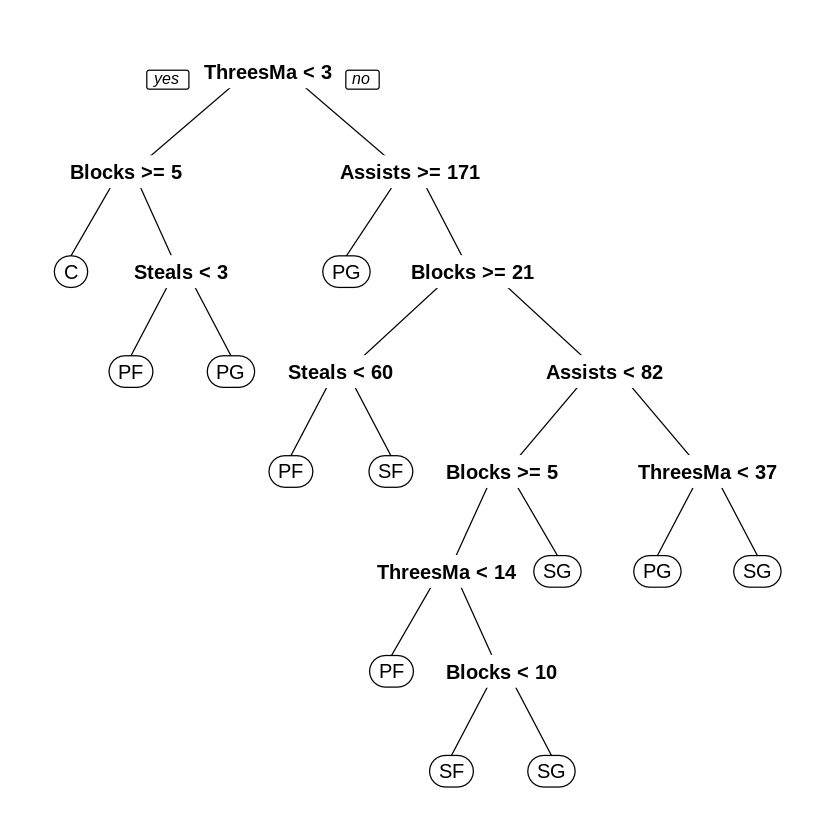

In [72]:
prp(DT)

In [73]:
posPred<-predict(DT,newdata= NBA1516[NBA1516$Test==T,]) #Test==T, test data
# 預設為class probabilities, type = "prob"
head(posPred)

,C,PF,PG,SF,SG
2,0.071,0.143,0.571,0.000,0.214
3,0.584,0.382,0.011,0.011,0.011
5,0.584,0.382,0.011,0.011,0.011
9,0.584,0.382,0.011,0.011,0.011
11,0.045,0.045,0.000,0.591,0.318
22,0.584,0.382,0.011,0.011,0.011


In [74]:
result<-cbind(round(posPred,digits = 2),
NBA1516[NBA1516$Test==T,]$Name,

as.character(NBA1516[NBA1516$Test==T,]$Position))
head(result)

,C,PF,PG,SF,SG,,
2,0.07,0.14,0.57,0,0.21,Jordan Adams,SG
3,0.58,0.38,0.01,0.01,0.01,Steven Adams,C
5,0.58,0.38,0.01,0.01,0.01,Alexis Ajinca,C
9,0.58,0.38,0.01,0.01,0.01,Lavoy Allen,PF
11,0.05,0.05,0,0.59,0.32,Al-farouq Aminu,SF
22,0.58,0.38,0.01,0.01,0.01,Joel Anthony,C


In [75]:
posPredC<-predict(DT,newdata= NBA1516[NBA1516$Test==T,],type = "class")
# type = "class" 直接預測類別
head(posPredC)

2  3  5  9 11 22 
PG  C  C  C SF  C 
Levels: C PF PG SF SG

In [76]:
resultC<-cbind(as.character(posPredC),NBA1516[NBA1516$Test==T,]$Name,
as.character(NBA1516[NBA1516$Test==T,]$Position))
head(resultC)

PG,Jordan Adams,SG
C,Steven Adams,C
C,Alexis Ajinca,C
C,Lavoy Allen,PF
SF,Al-farouq Aminu,SF
C,Joel Anthony,C
